In [1]:
import math
import json
import re
import typing

import randomhash
import requests
import matplotlib.pyplot as plt

import windowed

In [2]:
orwell1984_text = requests.get("http://gutenberg.net.au/ebooks01/0100021.txt").content.decode("utf-8-sig")
orwell1984_normalized_text = re.sub("\s+", " ", re.sub("[^a-zA-Z\s]+", "", orwell1984_text)).lower()
orwell1984_tokens = orwell1984_normalized_text.split()

mobydick_text = requests.get("https://www.gutenberg.org/files/2701/2701-0.txt").content.decode("utf-8-sig")
mobydick_normalized_text = re.sub("\s+", " ", re.sub("[^a-zA-Z\s]+", "", mobydick_text)).lower()
mobydick_tokens = mobydick_normalized_text.split()

In [3]:
waf_v1 = windowed.WindowedV1AffSample()

waf_v1_windowed_sample_size = []
waf_v1_windowed_cardinality = []
waf_v1_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v1.process(token)
    waf_v1_windowed_sample_size.append(waf_v1.size)
    waf_v1_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v1.w):timestamp])))
    waf_v1_windowed_cardinality_est.append(waf_v1.cardinality_estimate)

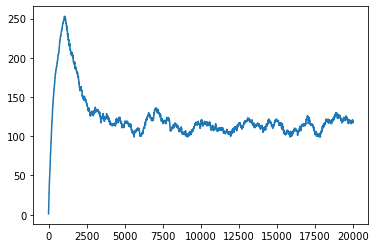

In [4]:
plt.plot(waf_v1_windowed_sample_size)

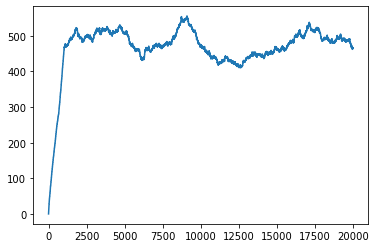

In [5]:
plt.plot(waf_v1_windowed_cardinality)

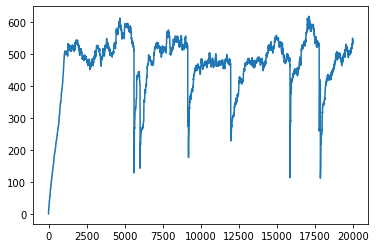

In [6]:
plt.plot(waf_v1_windowed_cardinality_est)

In [7]:
waf_v2 = windowed.WindowedV2AffSample()

waf_v2_windowed_sample_size = []
waf_v2_windowed_cardinality = []
waf_v2_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v2.process(token)
    waf_v2_windowed_sample_size.append(waf_v2.size)
    waf_v2_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v1.w):timestamp])))
    waf_v2_windowed_cardinality_est.append(waf_v2.cardinality_estimate)

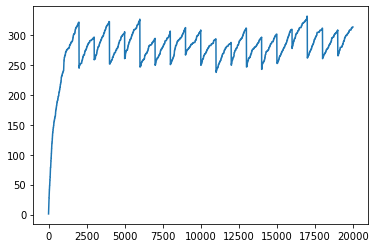

In [8]:
plt.plot(waf_v2_windowed_sample_size)

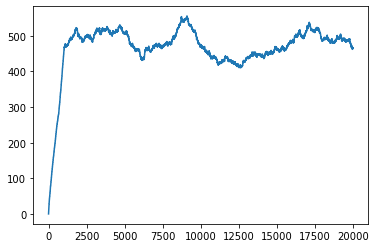

In [9]:
plt.plot(waf_v2_windowed_cardinality)

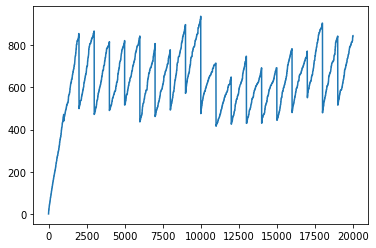

In [10]:
plt.plot(waf_v2_windowed_cardinality_est)

In [11]:
waf_v3 = windowed.WindowedV3AffSample()

waf_v3_windowed_sample_size = []
waf_v3_windowed_cardinality = []
waf_v3_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v3.process(token)
    waf_v3_windowed_sample_size.append(waf_v3.size)
    waf_v3_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v3.w):timestamp])))
    waf_v3_windowed_cardinality_est.append(waf_v3.cardinality_estimate)

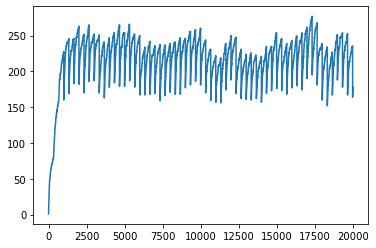

In [12]:
plt.plot(waf_v3_windowed_sample_size)

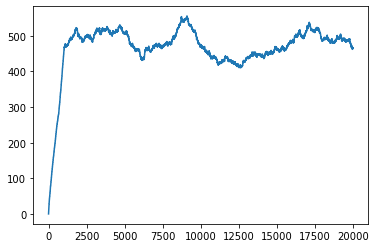

In [13]:
plt.plot(waf_v3_windowed_cardinality)

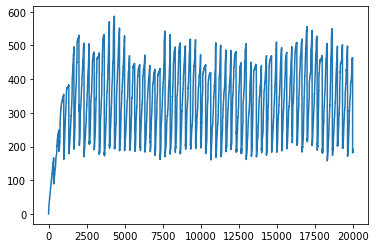

In [14]:
plt.plot(waf_v3_windowed_cardinality_est)

In [15]:
waf_v3.statistics

{'s0.case_A2': 20,
 's0.sample_tokens': 20,
 's0.sample_unique_tokens': 20,
 's0.total_tokens': 20,
 's1.case_A1': 107,
 's1.case_A2': 33,
 's1.case_B1': 84,
 's1.case_B2': 58,
 's1.case_B3': 51,
 's1.sample_replaced_tokens': 51,
 's1.sample_tokens': 168,
 's1.sample_unique_tokens': 91,
 's1.total_tokens': 333,
 's2.case_A1': 104,
 's2.case_A2': 33,
 's2.case_B1': 91,
 's2.case_B2': 59,
 's2.case_B3': 46,
 's2.sample_replaced_tokens': 46,
 's2.sample_tokens': 179,
 's2.sample_unique_tokens': 92,
 's2.total_tokens': 333}

In [16]:
waf_v3b = windowed.WindowedV3AffSample(m=10)

waf_v3b_windowed_sample_size = []
waf_v3b_windowed_cardinality = []
waf_v3b_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v3b.process(token)
    waf_v3b_windowed_sample_size.append(waf_v3b.size)
    waf_v3b_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v3b.w):timestamp])))
    waf_v3b_windowed_cardinality_est.append(waf_v3b.cardinality_estimate)

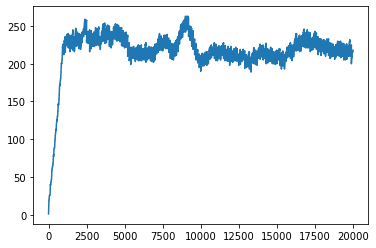

In [17]:
plt.plot(waf_v3b_windowed_sample_size)

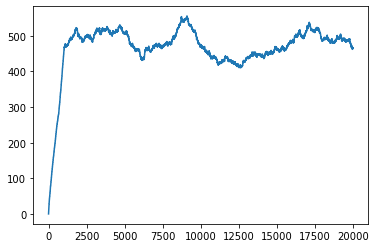

In [18]:
plt.plot(waf_v3b_windowed_cardinality)

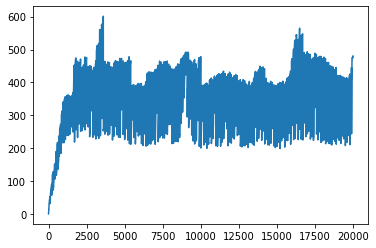

In [19]:
plt.plot(waf_v3b_windowed_cardinality_est)

In [20]:
waf_v4 = windowed.WindowedV4AffSample()

waf_v4_windowed_sample_size = []
waf_v4_windowed_cardinality = []
waf_v4_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v4.process(token)
    waf_v4_windowed_sample_size.append(waf_v4.size)
    waf_v4_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v4.w):timestamp])))
    waf_v4_windowed_cardinality_est.append(waf_v4.cardinality_estimate)

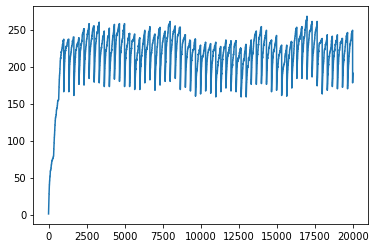

In [21]:
plt.plot(waf_v4_windowed_sample_size)

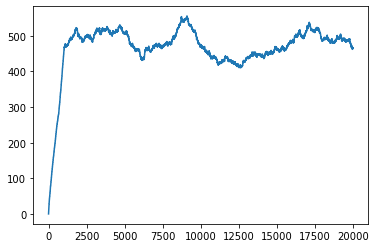

In [22]:
plt.plot(waf_v4_windowed_cardinality)

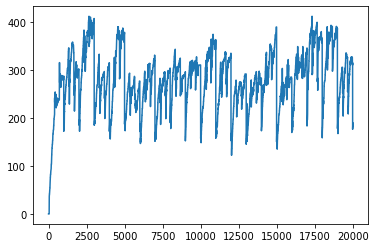

In [23]:
plt.plot(waf_v4_windowed_cardinality_est)

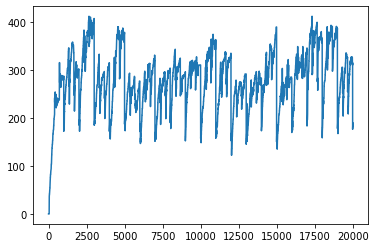

In [24]:
cap = 600
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v4_windowed_cardinality_est)))

In [25]:
waf_v4b = windowed.WindowedV4BAffSample()

waf_v4b_windowed_sample_size = []
waf_v4b_windowed_cardinality = []
waf_v4b_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v4b.process(token)
    waf_v4b_windowed_sample_size.append(waf_v4b.size)
    waf_v4b_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v4b.w):timestamp])))
    waf_v4b_windowed_cardinality_est.append(waf_v4b.cardinality_estimate)

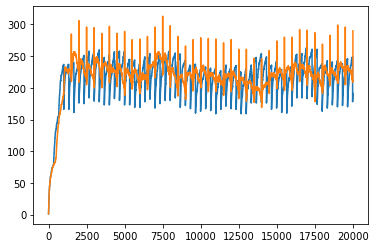

In [26]:
plt.plot(waf_v4_windowed_sample_size)
plt.plot(waf_v4b_windowed_sample_size)

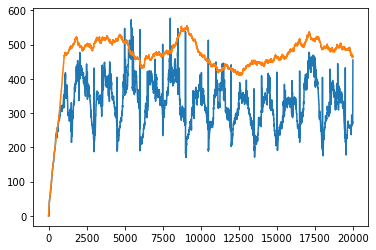

In [27]:
cap = 600
#plt.plot(list(map(lambda y: y if y < cap else cap, waf_v4_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v4b_windowed_cardinality_est)))
plt.plot(waf_v4_windowed_cardinality)

In [28]:
waf_v5 = windowed.WindowedV5AffSample()

waf_v5_windowed_sample_size = []
waf_v5_windowed_cardinality = []
waf_v5_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v5.process(token)
    waf_v5_windowed_sample_size.append(waf_v5.size)
    waf_v5_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v5.w):timestamp])))
    waf_v5_windowed_cardinality_est.append(waf_v5.cardinality_estimate)

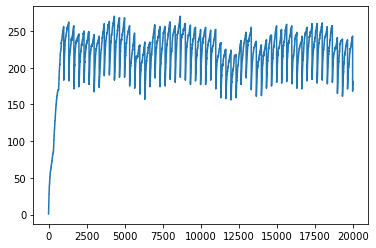

In [29]:
plt.plot(waf_v5_windowed_sample_size)

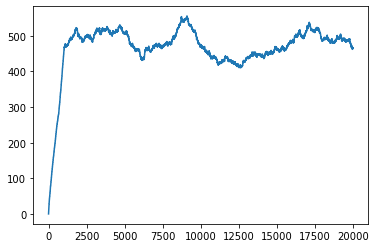

In [30]:
plt.plot(waf_v5_windowed_cardinality)

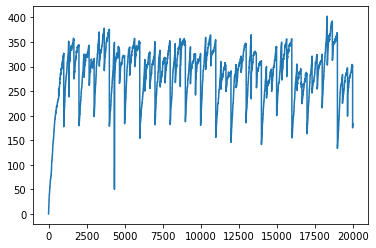

In [31]:
plt.plot(waf_v5_windowed_cardinality_est)

In [32]:
waf_v5b = windowed.WindowedV5BAffSample()

waf_v5b_windowed_sample_size = []
waf_v5b_windowed_cardinality = []
waf_v5b_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v5b.process(token)
    waf_v5b_windowed_sample_size.append(waf_v5b.size)
    waf_v5b_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v5b.w):timestamp])))
    waf_v5b_windowed_cardinality_est.append(waf_v5b.cardinality_estimate)

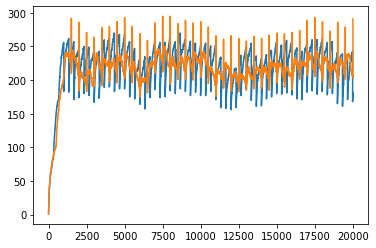

In [33]:
plt.plot(waf_v5_windowed_sample_size)
plt.plot(waf_v5b_windowed_sample_size)

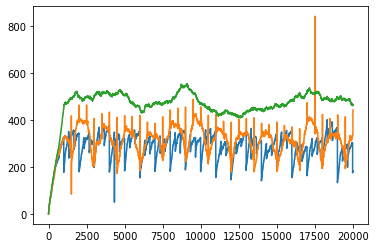

In [34]:
cap = 6000000
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b_windowed_cardinality_est)))
plt.plot(waf_v5_windowed_cardinality)

In [35]:
waf_v5b11 = windowed.WindowedV5BAffSample(m=11)

waf_v5b11_windowed_sample_size = []
waf_v5b11_windowed_cardinality = []
waf_v5b11_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v5b11.process(token)
    waf_v5b11_windowed_sample_size.append(waf_v5b11.size)
    waf_v5b11_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v5b11.w):timestamp])))
    waf_v5b11_windowed_cardinality_est.append(waf_v5b11.cardinality_estimate)

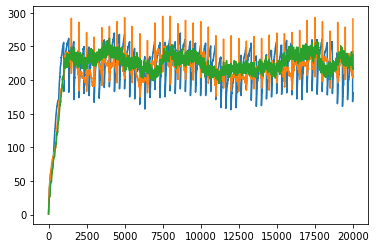

In [36]:
plt.plot(waf_v5_windowed_sample_size)
plt.plot(waf_v5b_windowed_sample_size)
plt.plot(waf_v5b11_windowed_sample_size)

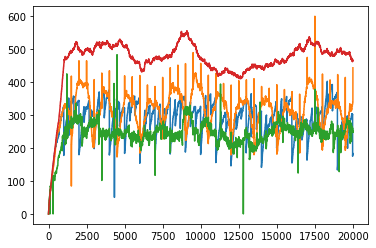

In [37]:
cap = 600
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b11_windowed_cardinality_est)))
plt.plot(waf_v5_windowed_cardinality)

In [38]:
waf_v5b11k500 = windowed.WindowedV5BAffSample(k=500, m=11)

waf_v5b11k500_windowed_sample_size = []
waf_v5b11k500_windowed_cardinality = []
waf_v5b11k500_windowed_cardinality_est = []

tokens = mobydick_tokens[:20000]

for timestamp, token in enumerate(tokens):
    waf_v5b11k500.process(token)
    waf_v5b11k500_windowed_sample_size.append(waf_v5b11k500.size)
    waf_v5b11k500_windowed_cardinality.append(len(set(tokens[max(0, timestamp - waf_v5b11k500.w):timestamp])))
    waf_v5b11k500_windowed_cardinality_est.append(waf_v5b11k500.cardinality_estimate)

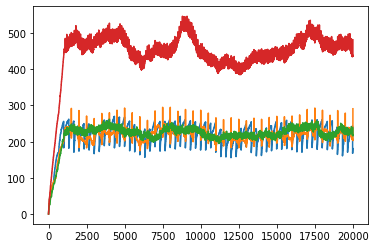

In [39]:
plt.plot(waf_v5_windowed_sample_size)
plt.plot(waf_v5b_windowed_sample_size)
plt.plot(waf_v5b11_windowed_sample_size)
plt.plot(waf_v5b11k500_windowed_sample_size)

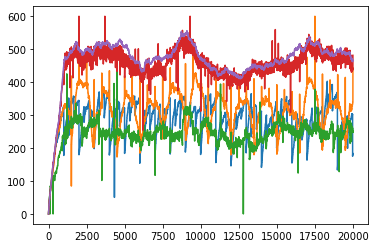

In [40]:
cap = 600
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b11_windowed_cardinality_est)))
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b11k500_windowed_cardinality_est)))
plt.plot(waf_v5_windowed_cardinality)

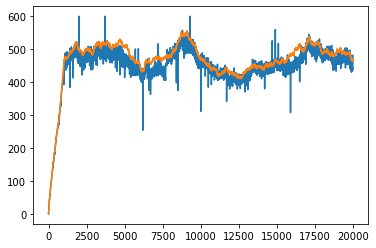

In [41]:
cap = 600
plt.plot(list(map(lambda y: y if y < cap else cap, waf_v5b11k500_windowed_cardinality_est)))
plt.plot(waf_v5_windowed_cardinality)

In [42]:
import importlib
importlib.reload(windowed)

<module 'windowed' from '/Users/jlumbroso/Programming/affirmative-sampling-sandbox/windowed.py'>

In [43]:
ws1 = windowed.WindowedSimulator(windowed.WindowedV5BAffSample(k=500, m=11), mobydick_tokens[:20000]).run()

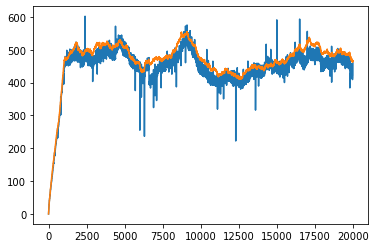

In [44]:
ws1.plot_card()